In [14]:
import os
import tarfile
import urllib.request
import pandas as pd


In [15]:
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml/master/"
HOUSING_PATH = "datasets/housing"
HOUSING_URL = DOWNLOAD_ROOT + HOUSING_PATH + "/housing.tgz"

# Función para descargar y extraer el dataset
def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    os.makedirs(housing_path, exist_ok=True)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    with tarfile.open(tgz_path) as housing_tgz:
        housing_tgz.extractall(path=housing_path, filter="data")

# Función para cargar el CSV en un DataFrame de pandas
def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

In [16]:
fetch_housing_data()
housing = load_housing_data()

# Mostramos primeras filas
print(housing.head())

   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY  


In [17]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [18]:
housing.ocean_proximity.value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [19]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


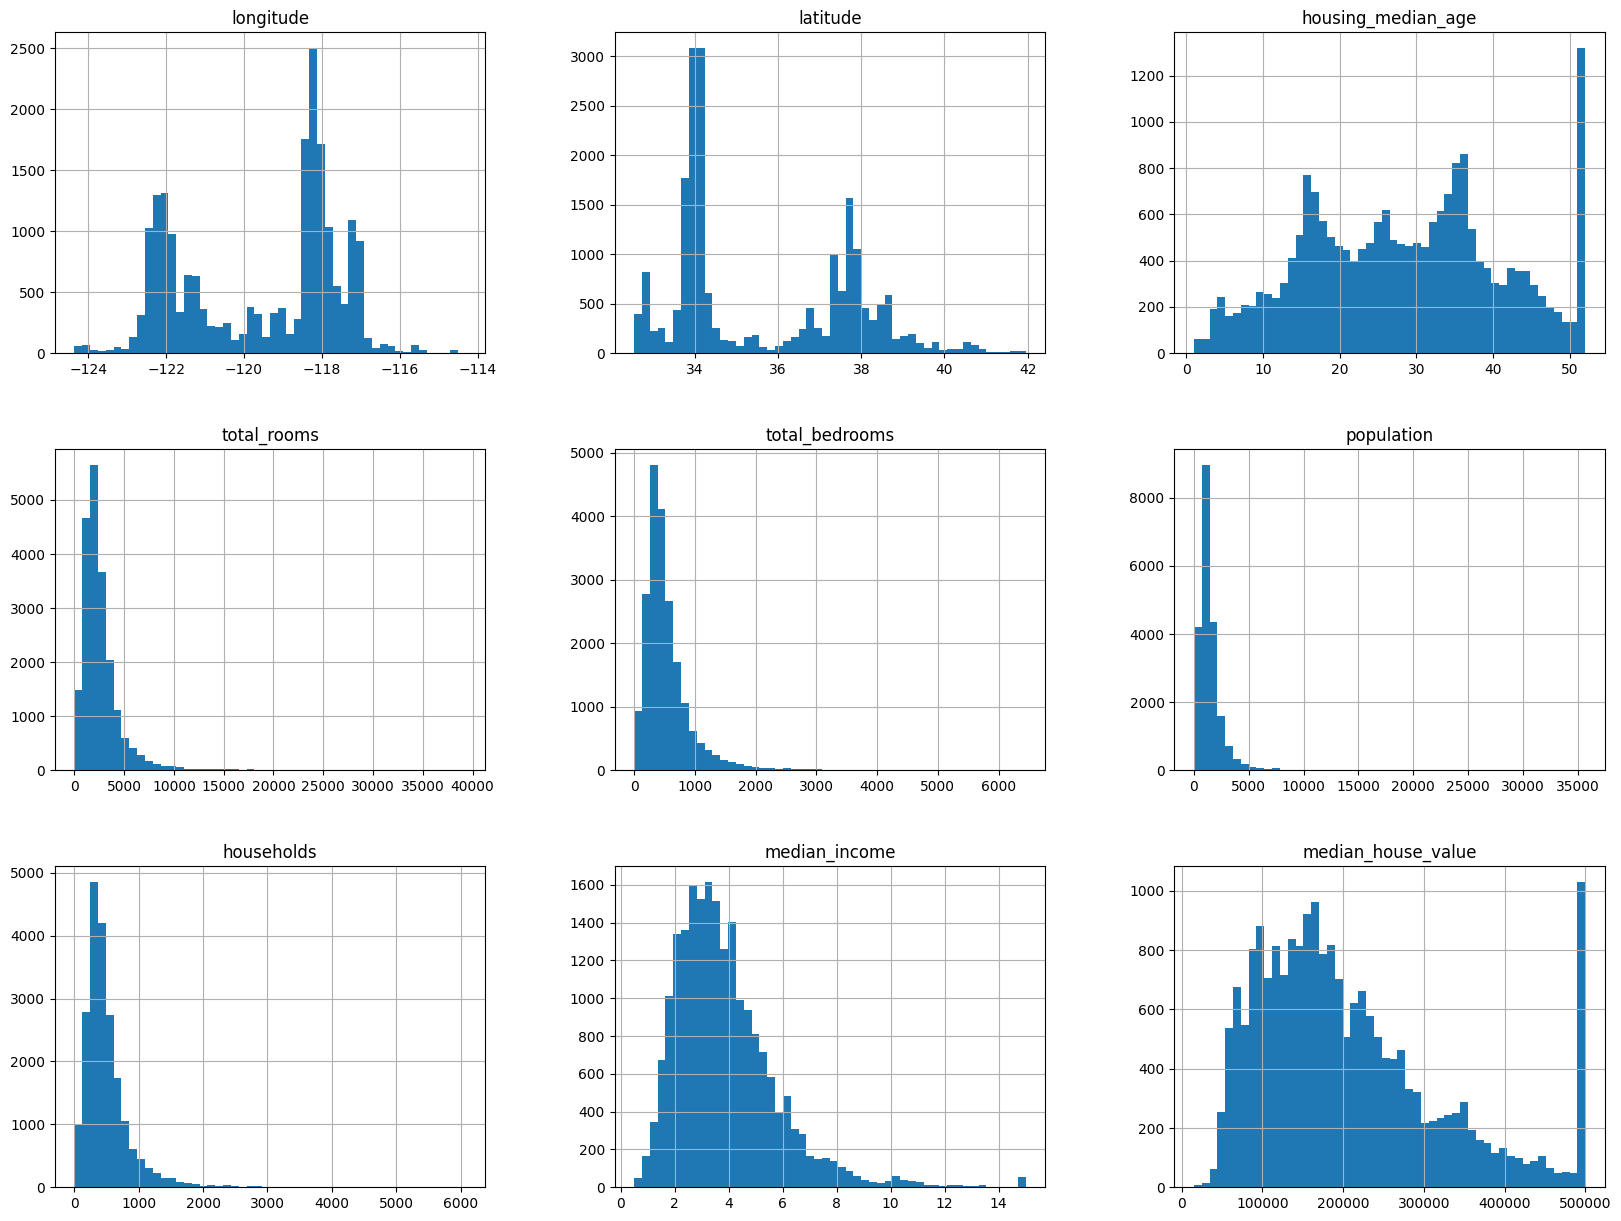

In [20]:
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(20,15))
plt.show()

In [9]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=24)
#Copiamos el conjunto de entrenamiento para evitar modificar el original
df = train_set.copy()
print("Tamaño del conjunto de entrenamiento:", len(train_set))
print("Tamaño del conjunto de prueba:", len(test_set))


Tamaño del conjunto de entrenamiento: 16512
Tamaño del conjunto de prueba: 4128


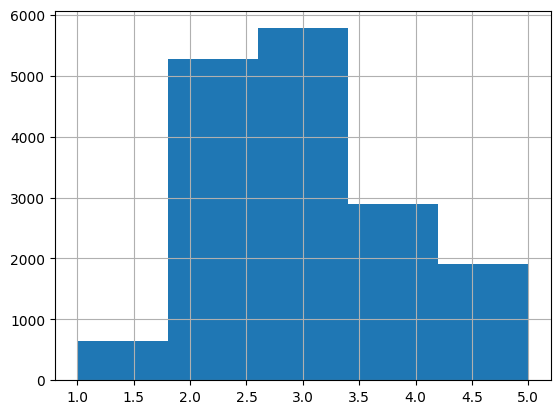

In [24]:
#Estratificar 
import numpy as np
#Where Mantiene los valores donde la condición se cumple. Reemplaza los que no se cumplen por otro_valor.
df["categoria_income"] = np.ceil(df["median_income"] / 1.5)
# 2. Reemplazar valores mayores o iguales a 5 por 5.0 SIN usar inplace
df["categoria_income"] = df["categoria_income"].where(df["categoria_income"] < 5, 5.0)

# 3. Visualizar
df["categoria_income"].hist(bins=5)

# Asegúrate de tener un índice limpio
df.reset_index(drop=True, inplace=True)

In [ ]:
#Una vez generada la variable categórica, podemos utilizar de nuevo la librería sklearn para generar un conjunto de test, pero esta vez estratificado.
from sklearn.model_selection import StratifiedShuffleSplit

# Crear el objeto de división estratificada
split = StratifiedShuffleSplit(n_splits=1, train_size=0.8, random_state=24)

# Aplicar la división basada en 'categoria_income'
for train_index, test_index in split.split(df, df["categoria_income"]):
    train_set = df.loc[train_index]
    test_set = df.loc[test_index]


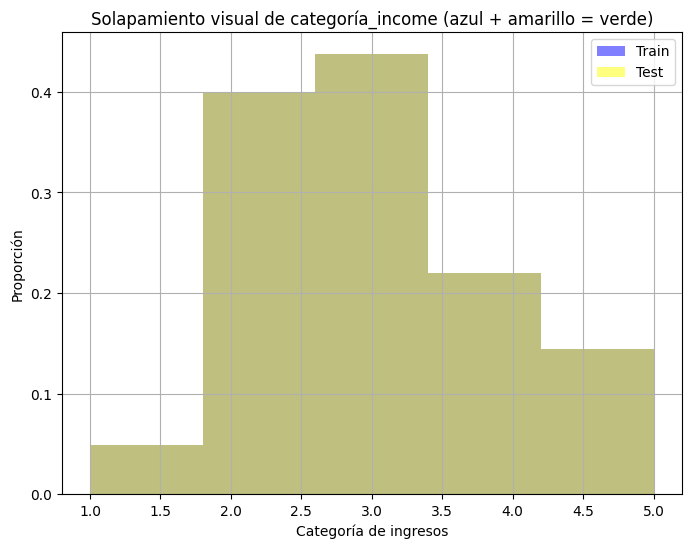

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))

train_set["categoria_income"].hist(
    bins=5, density=True, alpha=0.5, color='blue', label="Train"
)
test_set["categoria_income"].hist(
    bins=5, density=True, alpha=0.5, color='yellow', label="Test"
)

plt.xlabel("Categoría de ingresos")
plt.ylabel("Proporción")
plt.title("Solapamiento visual de categoría_income (azul + amarillo = verde)")
plt.legend()
plt.grid(True)
plt.show()

#Al ser todo verde es es que la suma es identica

In [29]:
# Proporciones de cada categoría en el dataset original
print("Datos de entrenamiento: ")
print(df["categoria_income"].value_counts() / len(df))

# Proporciones en el conjunto de test (estratificado)
print("Datos de test: ")
test_set["categoria_income"].value_counts() / len(test_set)


Datos de entrenamiento: 
categoria_income
3.0    0.349988
2.0    0.319707
4.0    0.175690
5.0    0.115552
1.0    0.039062
Name: count, dtype: float64
Datos de test: 


categoria_income
3.0    0.349985
2.0    0.319709
4.0    0.175598
5.0    0.115652
1.0    0.039055
Name: count, dtype: float64

In [35]:
test_set = test_set.drop(columns=['categoria_income'])
train_set = train_set.drop(columns=['categoria_income'])
# Creamos una copia del train set para no modificar el original
df = train_set.copy()

<Figure size 650x400 with 0 Axes>

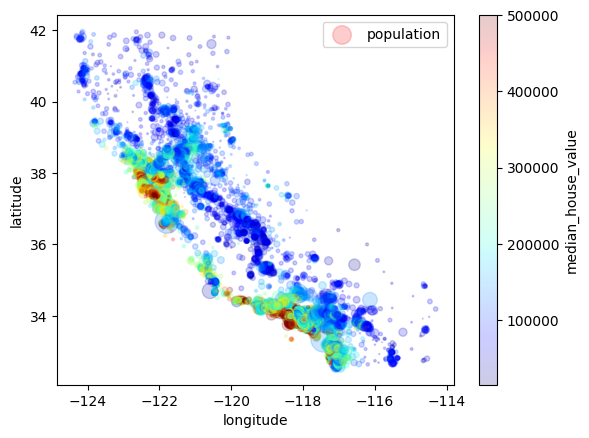

In [36]:
plt.figure(figsize=(6.5, 4))
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.2,
        s=housing["population"]/100, label="population",
        c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
       )
plt.legend()

In [37]:
housing.corr(numeric_only=True)["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

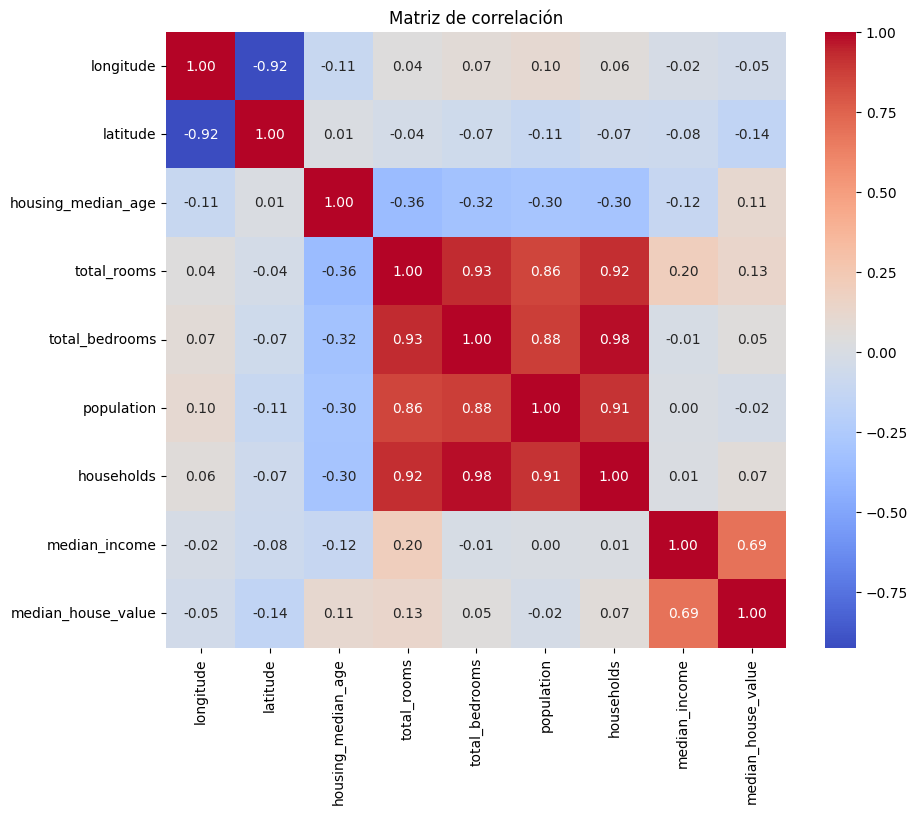

In [39]:
import seaborn as sns
plt.figure(figsize=(10, 8))
sns.heatmap(housing.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de correlación")
plt.show()


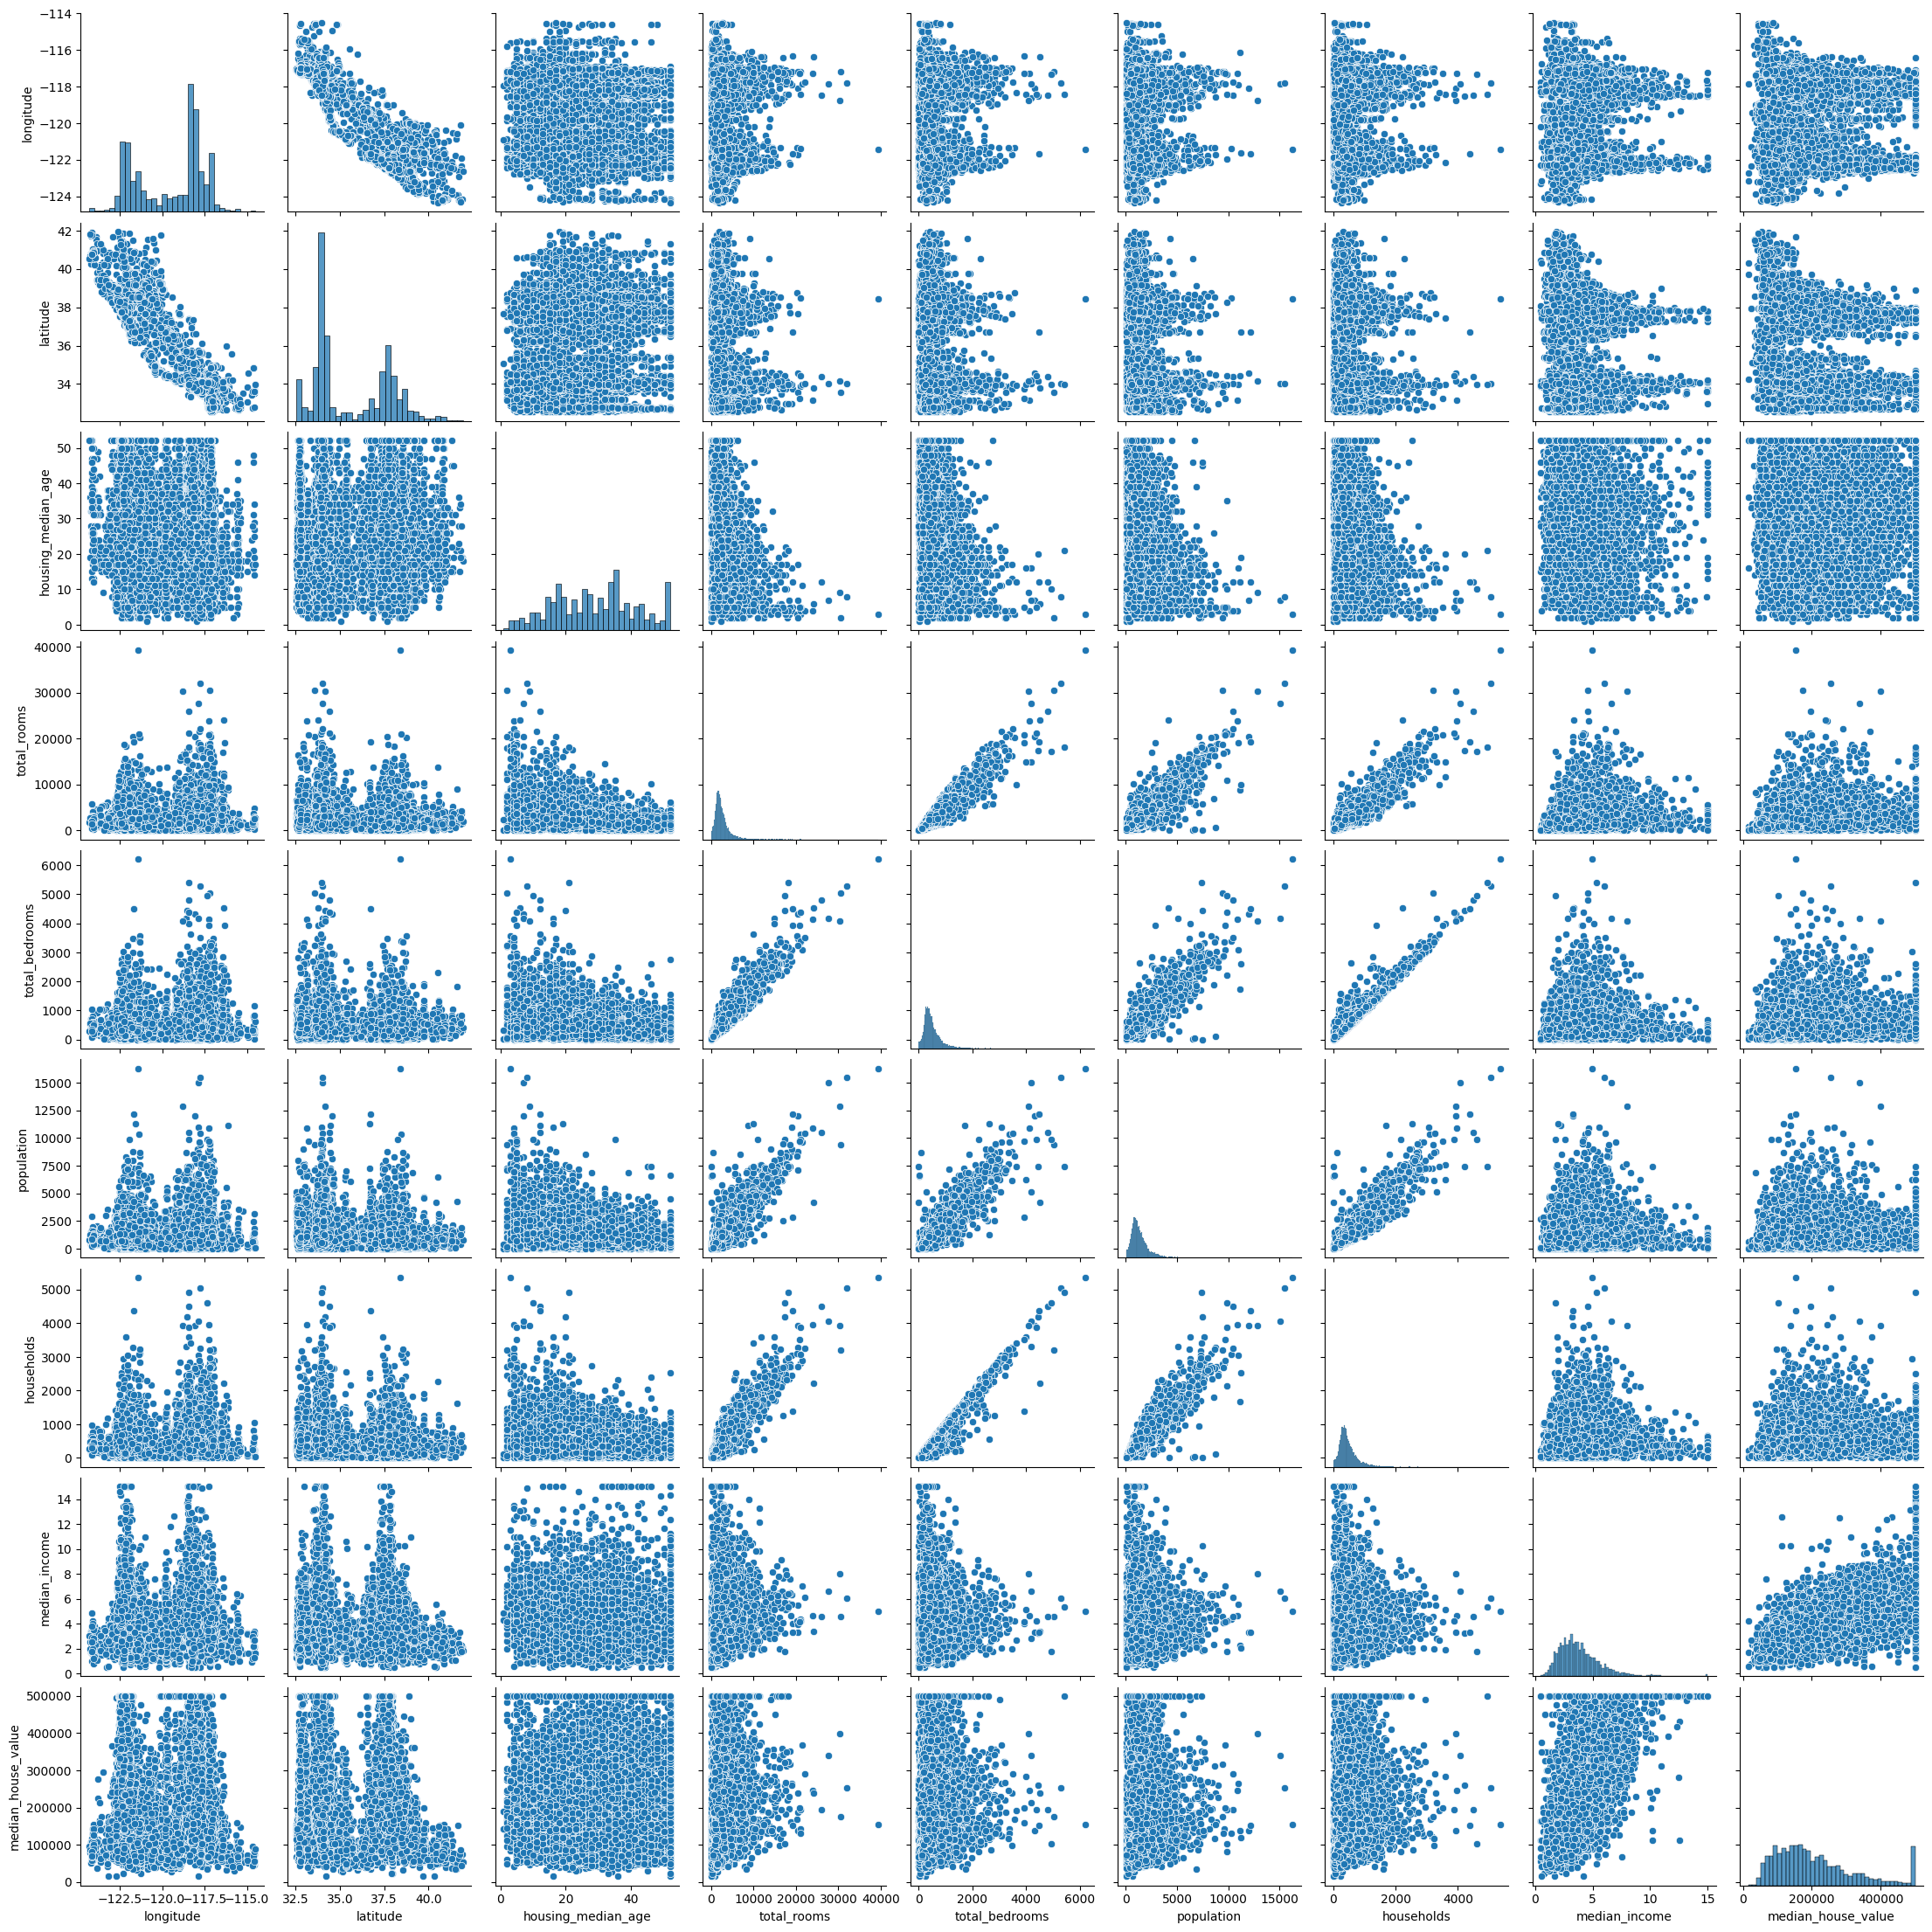

In [38]:
import seaborn as sns
sns.pairplot(df)
plt.show()

In [40]:
df["rooms_house"] = df["total_rooms"] / train_set["population"]
df["bedrooms_room"] = df["total_bedrooms"] / train_set["total_rooms"]
df["population_house"] = df["population"] / train_set["households"]
correlaciones = df.corr(numeric_only=True)
ratios = ["rooms_house", "bedrooms_room", "population_house"]
df[ratios + ["median_house_value"]].corr().iloc[:-1, -1].sort_values(ascending=False)



rooms_house         0.206394
population_house   -0.020181
bedrooms_room      -0.259904
Name: median_house_value, dtype: float64

In [41]:
train_df = train_set.drop("median_house_value", axis=1).copy()
train_target = train_set["median_house_value"].copy()


In [42]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")
numeric_df = train_df.drop("ocean_proximity", axis=1)
imputer.fit(numeric_df)
X = imputer.transform(numeric_df)

In [43]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit_transform(X)

array([[-1.21057922,  0.76841678,  0.26423867, ..., -0.20505932,
        -0.01340704,  1.1917773 ],
       [-1.05004376,  0.70723042, -1.16193755, ...,  1.1379547 ,
         1.03718415, -0.095967  ],
       [ 0.69076264, -0.80830869,  0.42270269, ...,  0.50290752,
        -0.42197028, -0.40625984],
       ...,
       [ 1.13223516, -0.73770904, -1.71656163, ...,  1.03272886,
         1.45635943, -0.23663519],
       [ 0.59544471,  0.2695126 , -1.4788656 , ..., -1.26193289,
        -1.26297384, -0.39370677],
       [ 1.25765349, -1.17072022, -0.52808145, ..., -0.29182448,
        -0.35829809,  0.71776714]], shape=(13209, 8))

In [44]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import numpy as np

le = LabelEncoder()
ohe = OneHotEncoder()
cat_encoded = le.fit_transform(train_df["ocean_proximity"])
print(le.classes_)  
cat_encoded = le.fit_transform(train_df["ocean_proximity"])
cat_ohe = ohe.fit_transform(np.array(cat_encoded).reshape(-1, 1))
cat_ohe


['<1H OCEAN' 'INLAND' 'ISLAND' 'NEAR BAY' 'NEAR OCEAN']


<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 13209 stored elements and shape (13209, 5)>

In [45]:
#Version simplificada más recomednadado ahora
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(sparse_output=False)
cat_ohe = ohe.fit_transform(train_df[["ocean_proximity"]])


In [46]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer

# 1. Columnas numéricas y categóricas
num_features = train_df.drop(columns=["ocean_proximity"]).columns
cat_features = ["ocean_proximity"]

# 2. Pipeline para numéricos: imputar + escalar
num_pipeline = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

# 3. Pipeline para categóricas: one-hot
cat_pipeline = Pipeline(steps=[
    ("encoder", OneHotEncoder(sparse_output=False))
])

# 4. Combinar numérico y categórico
full_pipeline = ColumnTransformer(transformers=[
    ("num", num_pipeline, num_features),
    ("cat", cat_pipeline, cat_features)
])

# 5. Aplicar pipeline al conjunto de entrenamiento
X_prepared = full_pipeline.fit_transform(train_df)


In [ ]:
import pandas as pd

# Recuperar nombres de columnas después del preprocesamiento
num_feature_names = num_features  # ya los tienes definidos
cat_feature_names = full_pipeline.named_transformers_["cat"].named_steps["encoder"].get_feature_names_out(cat_features)

# Unir nombres
all_feature_names = list(num_feature_names) + list(cat_feature_names)

# Crear DataFrame
X_df = pd.DataFrame(X_prepared, columns=all_feature_names) # type: ignore

# Ver primeras filas
X_df.head()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-1.210579,0.768417,0.264239,0.122447,-0.091170,-0.205059,-0.013407,1.191777,1.0,0.0,0.0,0.0,0.0
1,-1.050044,0.707230,-1.161938,0.966599,1.124611,1.137955,1.037184,-0.095967,1.0,0.0,0.0,0.0,0.0
2,0.690763,-0.808309,0.422703,-0.636322,-0.516572,0.502908,-0.421970,-0.406260,1.0,0.0,0.0,0.0,0.0
3,-0.889508,1.107295,0.581167,-0.310937,-0.100838,-0.384128,-0.334421,-0.984809,0.0,1.0,0.0,0.0,0.0
4,0.856315,-0.728296,0.264239,-0.861091,-1.045908,-1.033944,-1.066651,3.816687,1.0,0.0,0.0,0.0,0.0


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>, <Axes: >]],
      dtype=object)

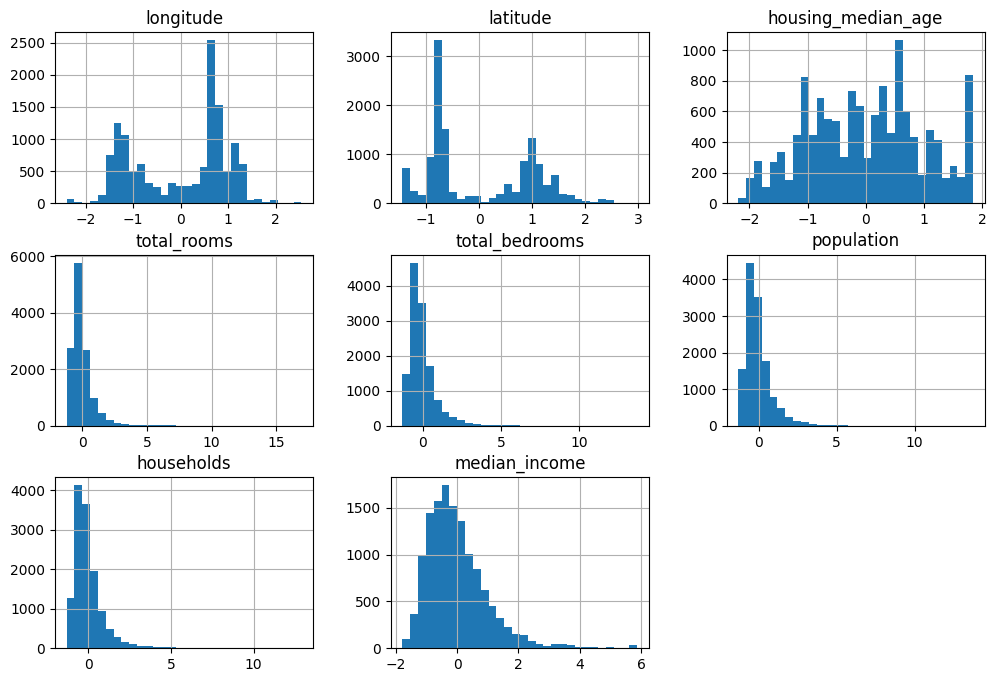

In [49]:
X_df.isna().sum().sum()
X_df[num_feature_names].hist(figsize=(12, 8), bins=30)



In [55]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, mean_squared_error, mean_absolute_error
import numpy as np

# Ejemplo con LinearRegression
#from sklearn.linear_model import LinearRegression
#model = LinearRegression()
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()

# R²
r2_scores = cross_val_score(model, X_prepared, train_target, scoring="r2", cv=5)

# RMSE (usamos MSE negativo porque sklearn así lo devuelve)
neg_mse_scores = cross_val_score(model, X_prepared, train_target, scoring="neg_mean_squared_error", cv=5)
rmse_scores = np.sqrt(-neg_mse_scores)

# MAE
neg_mae_scores = cross_val_score(model, X_prepared, train_target, scoring="neg_mean_absolute_error", cv=5)
mae_scores = -neg_mae_scores

# Función de impresión
def print_all_scores(name, r2, rmse, mae):
    print(f"--- {name} ---")
    print(f"R² -> Media: {r2.mean():.4f}, Desv: {r2.std():.4f}")
    print(f"RMSE -> Media: {rmse.mean():.4f}, Desv: {rmse.std():.4f}")
    print(f"MAE -> Media: {mae.mean():.4f}, Desv: {mae.std():.4f}")



#print_all_scores("Linear Regression", r2_scores, rmse_scores, mae_scores)
print_all_scores("RandomForest Regression", r2_scores, rmse_scores, mae_scores)



--- RandomForest Regression ---
R² -> Media: 0.8033, Desv: 0.0108
RMSE -> Media: 51066.3398, Desv: 1223.5944
MAE -> Media: 33137.0428, Desv: 590.8359


In [56]:
from sklearn.ensemble import RandomForestRegressor

# Instanciar el modelo Random Forest
forest_reg = RandomForestRegressor(random_state=42)

# Entrenar el modelo
forest_reg.fit(X_prepared, train_target)

# Obtener nombres de columnas numéricas
num_attribs = list(num_features)

# Obtener nombres de columnas categóricas tras OneHotEncoding
cat_encoder = full_pipeline.named_transformers_["cat"].named_steps["encoder"]
cat_attribs = list(cat_encoder.get_feature_names_out(cat_features))

# Unir todas las features
all_attribs = num_attribs + cat_attribs

# Emparejar importancia con nombre
importancias = sorted(
    zip(forest_reg.feature_importances_, all_attribs),
    reverse=True
)

# Ver las más importantes
for score, name in importancias[:10]:
    print(f"{name}: {score:.4f}")


median_income: 0.4791
ocean_proximity_INLAND: 0.1416
longitude: 0.1076
latitude: 0.1065
housing_median_age: 0.0540
population: 0.0329
total_rooms: 0.0266
total_bedrooms: 0.0219
households: 0.0198
ocean_proximity_NEAR OCEAN: 0.0060


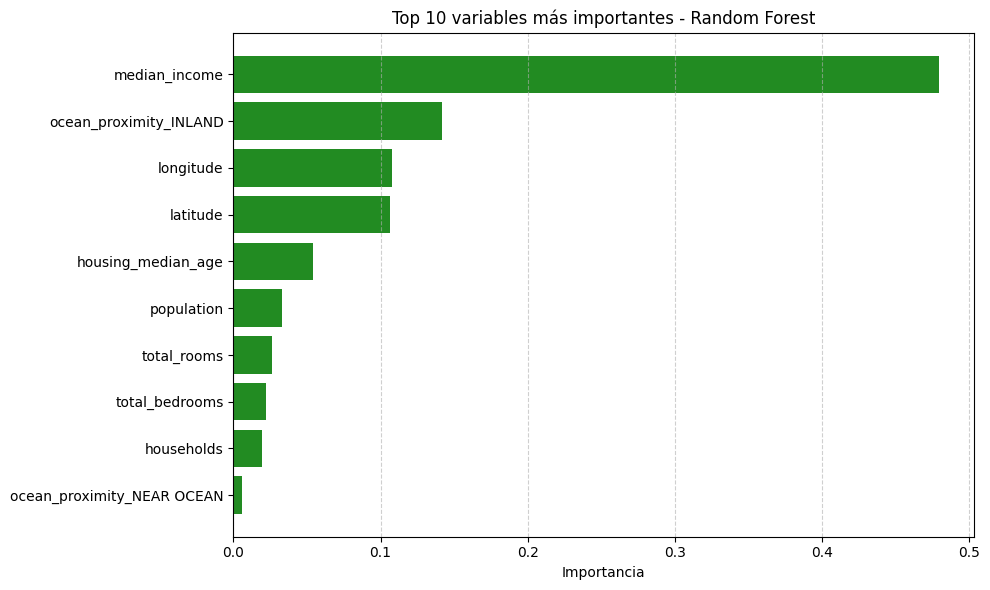

In [57]:
import matplotlib.pyplot as plt

# Seleccionar las 10 features más importantes
top_n = 10
top_features = importancias[:top_n]
scores, names = zip(*top_features)

# Crear gráfico
plt.figure(figsize=(10, 6))
plt.barh(names[::-1], scores[::-1], color="forestgreen")  # invertimos para que el más importante esté arriba
plt.xlabel("Importancia")
plt.title(f"Top {top_n} variables más importantes - Random Forest")
plt.grid(True, axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


In [58]:
# Evaluación en test set
X_test = test_set.drop("median_house_value", axis=1)
y_test = test_set["median_house_value"].copy()
X_test_final = full_pipeline.transform(X_test)

# Predicción
pred = forest_reg.predict(X_test_final)

# Evaluación
from sklearn.metrics import r2_score
r2 = r2_score(y_test, pred)
print(f"R² en test: {r2:.4f}")

R² en test: 0.8361


In [ ]:
# (Si no lo tienes instalado)
#pip install --upgrade pip setuptools wheel
#pip install protobuf==3.20.3 mlflow==2.3.1
#Este es el que yo creo que me ha funcionado
#pip install mlflow --no-build-isolation


#import mlflow.sklearn
#mlflow.sklearn.save_model(forest_reg, "./random_forest_model")
#Tendria que haber usado Crear un entorno con Python 3.10 o 3.11

In [64]:
import joblib

# Guardar modelo y pipeline
joblib.dump(forest_reg, "modelo_rf.pkl")
joblib.dump(full_pipeline, "pipeline.pkl")


['pipeline.pkl']